<a href="https://colab.research.google.com/github/Keerthykannan/cnn_model/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train=get_training_data('/content/drive/MyDrive/cnn/train')
test=get_training_data('/content/drive/MyDrive/cnn/test')
val=get_training_data('/content/drive/MyDrive/cnn/val')

<ipython-input-3-bae056bc5e39>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


# Preprocessing Data

**Analysing the data size**

In [ ]:
train.shape

(5216, 2)

In [ ]:
test.shape

(624, 2)

In [ ]:
val.shape

(16, 2)

In [ ]:
train_normal='/content/drive/MyDrive/cnn/train/NORMAL'
print(len([i for i in os.listdir(train_normal) if os.path.isfile(os.path.join(train_normal,i))]))

1341


In [ ]:
train_pneumonia='/content/drive/MyDrive/cnn/train/PNEUMONIA'
print(len([i for i in os.listdir(train_pneumonia) if os.path.isfile(os.path.join(train_pneumonia,i))]))

3875


The data seems imbalanced . To increase the no. of training examples, we will use data augmentation

In [ ]:
img=cv2.imread('/content/drive/MyDrive/cnn/test/NORMAL/IM-0001-0001.jpeg')

In [ ]:
img.shape

(1317, 1857, 3)

**visualising data**

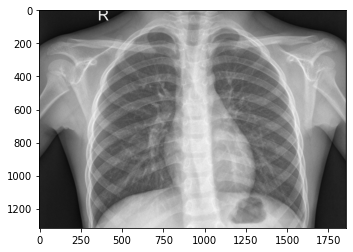

In [ ]:
plt.imshow(img)

Text(0.5, 1.0, 'NORMAL')

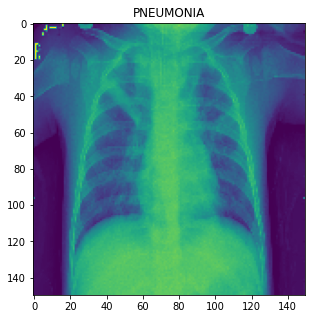

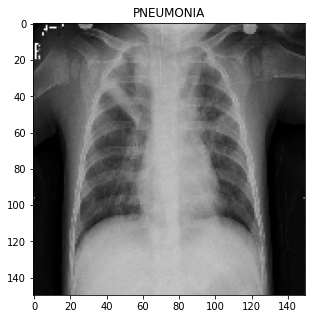

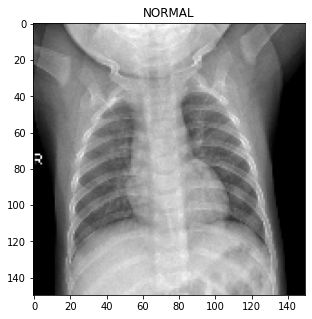

In [ ]:

plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0],cmap='gray')
plt.title(labels[train[-1][1]])


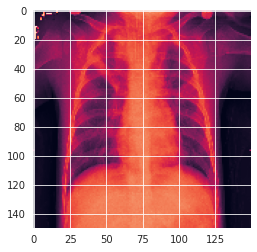

In [ ]:
plt.imshow(train[0][0])

**spliting data to train and test data**

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)    

**Normalize the data**

In [ ]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255

**resizing data**

In [ ]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [ ]:
x_test[0].shape
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)


**Data augmentation**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,  
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False)  


datagen.fit(x_train)

# Model creation

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [32]:
model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,
                    epochs = 10 ,validation_data = datagen.flow(x_val, y_val)) 
                    
                    

Epoch 1/10
163/163 [==============================] - 413s 3s/step - loss: 0.5142 - accuracy: 0.8480 - val_loss: 19.0789 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 412s 3s/step - loss: 0.2617 - accuracy: 0.9018 - val_loss: 23.2384 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 401s 2s/step - loss: 0.2234 - accuracy: 0.9191 - val_loss: 7.4989 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 399s 2s/step - loss: 0.2018 - accuracy: 0.9294 - val_loss: 62.4001 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 397s 2s/step - loss: 0.1800 - accuracy: 0.9358 - val_loss: 1.5586 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 397s 2s/step - loss: 0.1780 - accuracy: 0.9392 - val_loss: 0.5789 - val_accuracy: 0.5625
Epoch 7/10
163/163 [==============================] - 399s 2s/step - loss: 0.1642 - accuracy: 0.9425 - val_loss: 0.6561 - val_accuracy: 0.6

In [33]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 12s 592ms/step - loss: 0.2722 - accuracy: 0.8942
Loss of the model is -  0.27223220467567444
20/20 [==============================] - 11s 527ms/step - loss: 0.2722 - accuracy: 0.8942
Accuracy of the model is -  89.42307829856873 %


In [34]:
predictions = model.predict(x_test) 
for i in range(len(predictions)): 
    predictions[i] = 1 if predictions[i]>0.5 else 0


20/20 [==============================] - 10s 510ms/step


In [35]:
print(classification_report(y_test, 
                            predictions, 
                            target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.91      0.91       390
   Normal (Class 1)       0.85      0.87      0.86       234

           accuracy                           0.89       624
          macro avg       0.89      0.89      0.89       624
       weighted avg       0.89      0.89      0.89       624

